In [1]:
# We are going to plot a scatter plot representing correlation between median salary and demand of the top 10 demanding job skills 

In [2]:
import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt

data = load_dataset("lukebarousse/data_jobs")
df = data['train'].to_pandas()

df.drop_duplicates(inplace = True)
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 785640 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785640 non-null  object        
 1   job_title              785639 non-null  object        
 2   job_location           784595 non-null  object        
 3   job_via                785632 non-null  object        
 4   job_schedule_type      772975 non-null  object        
 5   job_work_from_home     785640 non-null  bool          
 6   search_location        785640 non-null  object        
 7   job_posted_date        785640 non-null  datetime64[ns]
 8   job_no_degree_mention  785640 non-null  bool          
 9   job_health_insurance   785640 non-null  bool          
 10  job_country            785591 non-null  object        
 11  salary_rate            33066 non-null   object        
 12  salary_year_avg        22002 non-null   float64  

In [3]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [4]:
df_og = df.copy()

df.dropna(subset = "job_skills", inplace = True)
df.dropna(subset = "salary_year_avg", inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20169 entries, 28 to 785692
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        20169 non-null  object        
 1   job_title              20169 non-null  object        
 2   job_location           19919 non-null  object        
 3   job_via                20169 non-null  object        
 4   job_schedule_type      20157 non-null  object        
 5   job_work_from_home     20169 non-null  bool          
 6   search_location        20169 non-null  object        
 7   job_posted_date        20169 non-null  datetime64[ns]
 8   job_no_degree_mention  20169 non-null  bool          
 9   job_health_insurance   20169 non-null  bool          
 10  job_country            20169 non-null  object        
 11  salary_rate            20169 non-null  object        
 12  salary_year_avg        20169 non-null  float64       
 13  sala

In [5]:
import ast
df['job_skills'] = df.job_skills.apply(lambda sk : ast.literal_eval(sk) if pd.notna(sk) else sk)

type(df.job_skills.iloc[1])

list

In [6]:
df_ex = df.explode("job_skills")

df_ex.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
28,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,Costa Rica,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,NaN,Netskope,gdpr,"{'analyst_tools': ['excel'], 'libraries': ['gd..."
28,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,Costa Rica,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,NaN,Netskope,excel,"{'analyst_tools': ['excel'], 'libraries': ['gd..."
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,Sudan,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,NaN,Intelletec,mongodb,"{'analyst_tools': ['tableau'], 'cloud': ['orac..."
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,Sudan,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,NaN,Intelletec,mongodb,"{'analyst_tools': ['tableau'], 'cloud': ['orac..."
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,Sudan,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,NaN,Intelletec,python,"{'analyst_tools': ['tableau'], 'cloud': ['orac..."


In [7]:
df_plt_og = df_ex.groupby("job_skills").agg(
    median_salary = ("salary_year_avg", "median"), 
    demand = ("job_skills", "size"))

# df_plt = df_ex.groupby("job_skills").agg(median_salary = ("salary_year_avg", "median"), demand = ("job_skills", "size"))

df_plt_og

# See the .agg() function is new to you for .groupby()

,median_salary,demand
job_skills,,
airflow,147090.500000,1497
airtable,102500.000000,22
alteryx,115000.000000,386
angular,130000.000000,113
angular.js,127050.000000,2
...,...,...
workfront,93480.054688,8
wrike,101250.000000,2
xamarin,121250.000000,2


In [8]:
df_plt = df_plt_og.sort_values(by = "demand", ascending = False).head(10).copy()

df_plt

,median_salary,demand
job_skills,,
sql,120000.0,12950
python,125000.0,12869
r,119550.0,5088
aws,135000.0,4949
tableau,111175.0,4813
spark,140000.0,4016
excel,92500.0,3822
azure,125000.0,3466
sas,110000.0,3132


<Axes: xlabel='demand', ylabel='median_salary'>

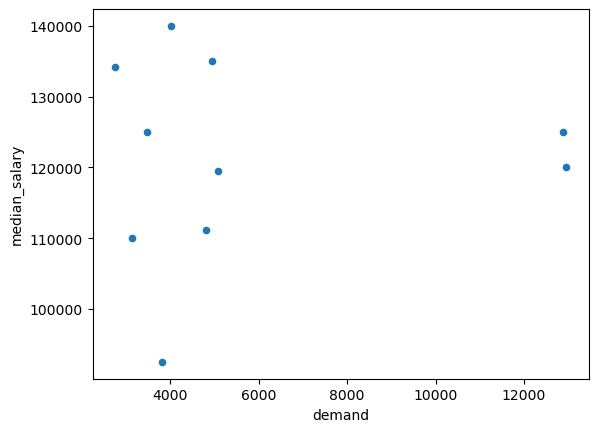

In [9]:
df_plt.plot(kind = "scatter", x = "demand", y = "median_salary")

# See matplotlib does not provide name to the dots, its a problem of this library
# Thats why for scatter plot we usually use seaborn which we learn later 
# But for now we have patch for this, named matplotlib.pyplot.text() allow us to input a str at a perticular position
# using coordinates. Here, I attached a docx for more info.
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html

In [10]:
# Okay instead of manually do the work we will use loops.

# Okay lets dive then.

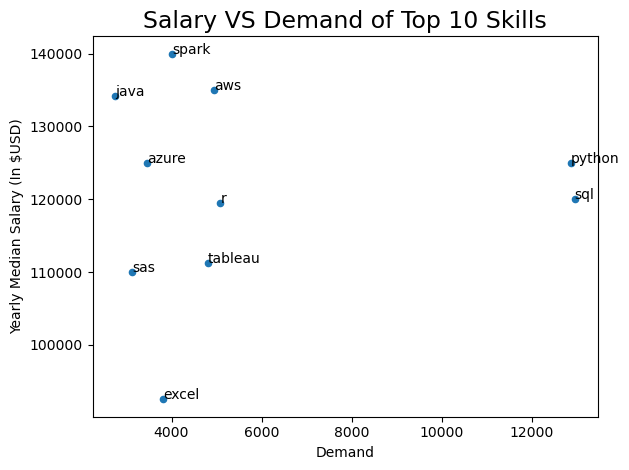

In [11]:
df_plt.plot(kind = "scatter", x = "demand", y = "median_salary")

for i, sk in enumerate(df_plt.index) :
    plt.text(y = df_plt.median_salary.iloc[i], x = df_plt.demand.iloc[i], s = sk)

plt.title("Salary VS Demand of Top 10 Skills", fontsize = 17)
plt.ylabel("Yearly Median Salary (In $USD)")
plt.xlabel("Demand")
plt.tight_layout()
plt.show()
